<h1 align=center><font size = 5>Trabajo Práctico Módulo 2: 
Fundamentos de Aprendizaje Automático </font></h1> 

### **Tabla de contenidos**

  1. [Consignas](#q1) 
  2. [Importacion de librerias](#q2) 
  3. [Carga del Dataset](#q3)
    4. [Análisis exploratorio](#q4)
    5. [Tratamiento de Nulos](#q5)
    6. [Reemplazo de Unknowns](#q6)
    7. [Transformación de variables categóricas](#q7)
    8. [Distribucción y relación entre variables](#q8)
    9. [Correlacion](#q9)
  10. [Entrenamiento](#q10)
  11. [División set de entrenamiento y de prueba](#q11)
  12. [Creacion de Pipelines](#q12)
  13. [Balanceo de clases](#q13)
  14. [Escalamiento de los datos](#q14)
  15. [Regresion Logistica](#q15)
  16. [KNN](#q16)
  17. [Arbol de Decision](#q17)
  18. [SVM](#q18)
  19. [Pipelines de entrenamiento](#q19)


Consignas <a name="q1"></a>

Los datos utilizados corresponden a los clientes de una tarjeta de crédito de un banco. En el mismo podemos identificar las siguientes columnas:  

CLIENTNUM: identificador único del cliente.  
**Attrition_Flag**: Indica si el cliente sigue vigente o si ha cancelado la tarjeta.  
Customer_Age: edad del cliente.  
Gender: género del cliente.  
Dependent_count: cantidad de dependientes que posee el cliente.  
Education_Level: nivel educativo del cliente.  
Marital_Status: estado civil del cliente.  
Income_Category: categorización de ingresos del cliente.  
Card_Category: tipo de tarjeta que posee el cliente.  
Months_on_book: cantidad de meses desde que el cliente tiene la tarjeta   de crédito.   
Total_Relationship_Count: cantidad de productos que tiene el cliente.  
Months_Inactive_12_mon: cantidad de meses inactivos en los últimos 12   meses.  
Contacts_Count_12_mon: cantidad de veces que se contactó al cliente en los últimos 12 meses.  
Credit_Limit: límite de crédito de la tarjeta.  
Total_Revolving_Bal: un saldo renovable es la parte del gasto de la tarjeta de crédito que no se paga al final de un ciclo de facturación.  
Avg_Open_To_Buy: promedio del saldo disponible.  
Total_Amt_Chng_Q4_Q1: cambios en los montos de las transacciones.  
Total_Trans_Amt: monto total de transacciones.  
Total_Trans_Ct: cantidad total de transacciones.  
Total_Ct_Chng_Q4_Q1: cambios en la cantidad de transacciones.  
Avg_Utilization_Ratio: promedio de utilización de la tarjeta.  

Consigna:
**El objetivo del proyecto es predecir aquellos clientes con mayor propensión a cancelar la tarjeta de crédito del banco, lo que se conoce como Churn. Es decir, predecir el valor de la columna Attrition_Flag**.  

El trabajo debe incluir:

1) Análisis Exploratorio de Datos

Responder algunas preguntas generales del dominio. Por ejemplo: 
-Cantidad de personas que cancelan la tarjeta según sus ingresos, o dependientes. Edad promedio de los clientes, nivel educativo más frecuente, etc.  
-Análisis de Valores Nulos. Nota: los nulos se presentan con la palabra “unknown”.  
-Análisis de Outliers.  
-Transformación de variables categóricas. Evaluar cuándo usar one hot encoding o label encoding.  
-Análisis de Distribución y Análisis de correlación de las variables.  

2) Dividir los datos en set de entrenamiento y en set de prueba. Trabajar con el set de entrenamiento. Evaluar desbalance de clases, probar hacer un balance un poco más equitativo, probar llevarlo a 50-50. (Oversampling, undersampling o SMOTE)

3) Entrenar 3 modelos de clasificación. Utilizar técnicas de** k-fold **y **grid search** encontrar los mejores hiper parámetros.

4) Reportar los resultados de cada modelo (Accuracy. Recall, Precision y F-score). Incluir matriz de confusión. Seleccionar el mejor modelo en base al análisis de las métricas.

5) Este punto es opcional: Incluir algún gráfico de Explainability.

Se debe entregar:
Jupyter notebook o un archivo .py con el Código organizado. Deben incluirse **comentarios **y breve interpretaciones de los resultados.
Una presentación de máximo 15 diapositivas, y elaborar un video de dicha presentación, explicando los hallazgos obtenidos (no más de 5 minutos).


# Preparacion del entorno de trabajo

## Importacion de librerias <a name="q2"></a>

In [ ]:
%%capture
!pip install imblearn
!pip install shap
!pip install ipywidgets
import shap
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder,StandardScaler, OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_validate
from sklearn.base import BaseEstimator, TransformerMixin
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from datetime import datetime
from xgboost import XGBClassifier
import statistics as stat
pd.set_option('display.float_format', lambda x: '%.3f' % x) #Para transformar la notación científica

     |████████████████████████████████| 358kB 14.1MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491619 sha256=5f581a4697a8525a254cd818896fbb4d65026ebdc0b1cf66ac5fb526c9466374
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.



## Carga del Dataset <a name="q3"></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel('/content/drive/Shareddrives/Diplo DS -Grupo 01/TP2/BankChurners.csv')

## Análisis exploratorio <a name="q4"></a>

In [ ]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


In [ ]:
df.shape

(10127, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

1) Análisis Exploratorio de Datos

In [ ]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000
mean,739177606.334,46.326,2.346,35.928,3.813,2.341,2.455,8631.954,1162.814,7469.140,0.760,4404.086,64.859,0.712,0.275
std,36903783.450,8.017,1.299,7.986,1.554,1.011,1.106,9088.777,814.987,9090.685,0.219,3397.129,23.473,0.238,0.276
min,708082083.000,26.000,0.000,13.000,1.000,0.000,0.000,1438.300,0.000,3.000,0.000,510.000,10.000,0.000,0.000
25%,713036770.500,41.000,1.000,31.000,3.000,2.000,2.000,2555.000,359.000,1324.500,0.631,2155.500,45.000,0.582,0.023
50%,717926358.000,46.000,2.000,36.000,4.000,2.000,2.000,4549.000,1276.000,3474.000,0.736,3899.000,67.000,0.702,0.176
75%,773143533.000,52.000,3.000,40.000,5.000,3.000,3.000,11067.500,1784.000,9859.000,0.859,4741.000,81.000,0.818,0.503
max,828343083.000,73.000,5.000,56.000,6.000,6.000,6.000,34516.000,2517.000,34516.000,3.397,18484.000,139.000,3.714,0.999


Dropeamos la columna cliente ya que no la vamos a utlizar

In [ ]:
df=df.drop(['CLIENTNUM'], axis=1)

Se verifica si hay alguna fila duplicada completamente (en todos sus campos)


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum() / len(df)

Attrition_Flag             0.000
Customer_Age               0.000
Gender                     0.000
Dependent_count            0.000
Education_Level            0.000
Marital_Status             0.000
Income_Category            0.000
Card_Category              0.000
Months_on_book             0.000
Total_Relationship_Count   0.000
Months_Inactive_12_mon     0.000
Contacts_Count_12_mon      0.000
Credit_Limit               0.000
Total_Revolving_Bal        0.000
Avg_Open_To_Buy            0.000
Total_Amt_Chng_Q4_Q1       0.000
Total_Trans_Amt            0.000
Total_Trans_Ct             0.000
Total_Ct_Chng_Q4_Q1        0.000
Avg_Utilization_Ratio      0.000
dtype: float64

## Tratamiento de Nulos <a name="q5"></a>

Se verifica qué columnas tienen "Unknown" dentro (son tratados como nulos)

In [ ]:
df.loc[:,(df=='Unknown').any()].columns.tolist()

['Education_Level', 'Marital_Status', 'Income_Category']

Proporción de Unknowns

In [ ]:
df.Education_Level.value_counts(normalize=True)


Graduate        0.309
High School     0.199
Unknown         0.150
Uneducated      0.147
College         0.100
Post-Graduate   0.051
Doctorate       0.045
Name: Education_Level, dtype: float64

In [ ]:
df.Marital_Status.value_counts(normalize=True)

Married    0.463
Single     0.389
Unknown    0.074
Divorced   0.074
Name: Marital_Status, dtype: float64

In [ ]:
df.Income_Category.value_counts(normalize=True)

Less than $40K   0.352
$40K - $60K      0.177
$80K - $120K     0.152
$60K - $80K      0.138
Unknown          0.110
$120K +          0.072
Name: Income_Category, dtype: float64

In [ ]:
df.groupby(['Education_Level','Marital_Status','Income_Category']).size()

Education_Level  Marital_Status  Income_Category
College          Divorced        $120K +             3
                                 $40K - $60K        23
                                 $60K - $80K         7
                                 $80K - $120K       13
                                 Less than $40K     30
                                                    ..
Unknown          Unknown         $40K - $60K        23
                                 $60K - $80K        13
                                 $80K - $120K       22
                                 Less than $40K     37
                                 Unknown             7
Length: 168, dtype: int64

Se encuentran 7 filas que poseen 'Unknown' en los tres atributos ('Education_Level', 'Marital_Status', 'Income_Category').


Se transforman los 'Unknown' en cero para poder ser tratados con mayor facilidad.

In [ ]:
df[['Education_Level','Marital_Status', 'Income_Category']]=df[['Education_Level','Marital_Status', 'Income_Category']].replace('Unknown', np.nan)

## Reemplazo de Unknowns <a name="q6"></a>


Cantidad de nulos en cada categoria

In [ ]:
df[['Education_Level','Marital_Status', 'Income_Category']].isnull().sum()

Education_Level    1519
Marital_Status      749
Income_Category    1112
dtype: int64

Creación y aplicacion de funciones que remplazan los nulos aleatoriamente con las etiquetas, siguiendo la proporcion previa

In [ ]:
def ed(x):
    import random
    if pd.isnull(x):
        res=np.random.choice(df['Education_Level'].value_counts(normalize=True).keys().tolist(),p=df['Education_Level'].value_counts(normalize=True).tolist())
    else:
        res=x
    return res

In [ ]:
def ms(x):
    import random
    if pd.isnull(x):
        res=np.random.choice(df['Marital_Status'].value_counts(normalize=True).keys().tolist(),p=df['Marital_Status'].value_counts(normalize=True).tolist())
    else:
        res=x
    return res

In [ ]:
def ic(x):
    import random
    if pd.isnull(x):
        res=np.random.choice(df['Income_Category'].value_counts(normalize=True).keys().tolist(),p=df['Income_Category'].value_counts(normalize=True).tolist())
    else:
        res=x
    return res

In [ ]:
df['Education_Level']=df['Education_Level'].apply(ed)

In [ ]:
df['Marital_Status']=df['Marital_Status'].apply(ms)

In [ ]:
df['Income_Category']=df['Income_Category'].apply(ic)

## Transformación de variables categóricas <a name="q7"></a>

In [ ]:
df.dtypes

Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

Transformación de variables categóricas. 

Para comenzar, se muestran cuáles son:

In [ ]:
for col_obj in df.select_dtypes(['object']).columns:
  print(col_obj, '\n')
  print('Cantidad de valores unicos: ', df[col_obj].nunique())
  if df[col_obj].nunique()<10:
    print(df[col_obj].value_counts())
  print('----------------\n')

Attrition_Flag 

Cantidad de valores unicos:  2
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
----------------

Gender 

Cantidad de valores unicos:  2
F    5358
M    4769
Name: Gender, dtype: int64
----------------

Education_Level 

Cantidad de valores unicos:  6
Graduate         3711
High School      2358
Uneducated       1757
College          1181
Post-Graduate     594
Doctorate         526
Name: Education_Level, dtype: int64
----------------

Marital_Status 

Cantidad de valores unicos:  3
Married     5069
Single      4244
Divorced     814
Name: Marital_Status, dtype: int64
----------------

Income_Category 

Cantidad de valores unicos:  5
Less than $40K    4014
$40K - $60K       2005
$80K - $120K      1728
$60K - $80K       1563
$120K +            817
Name: Income_Category, dtype: int64
----------------

Card_Category 

Cantidad de valores unicos:  4
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, d

Se aplica transformación OneHotEncoder a aquellas que no conllevan una relación de orden y ,por otro lado, OrdinalEncoder a las que sí lo presentan. 

In [ ]:
enc=OneHotEncoder()
flag=pd.DataFrame(enc.fit_transform(df[['Attrition_Flag']]).toarray(),
                 columns=['Attrited_Customer', 'Existing_Customer'])
df=df.join(flag)

In [ ]:
df=df.drop(['Attrition_Flag'], axis=1)

In [ ]:
df.Income_Category.value_counts(normalize=True)

Less than $40K   0.396
$40K - $60K      0.198
$80K - $120K     0.171
$60K - $80K      0.154
$120K +          0.081
Name: Income_Category, dtype: float64

In [ ]:
df.query('Existing_Customer==1').Income_Category.value_counts(normalize=True)

Less than $40K   0.391
$40K - $60K      0.200
$80K - $120K     0.170
$60K - $80K      0.159
$120K +          0.080
Name: Income_Category, dtype: float64

In [ ]:
df.query('Attrited_Customer==1').Income_Category.value_counts(normalize=True)

Less than $40K   0.423
$40K - $60K      0.189
$80K - $120K     0.173
$60K - $80K      0.130
$120K +          0.085
Name: Income_Category, dtype: float64

In [ ]:
df.query('Attrited_Customer==1').Dependent_count.value_counts(normalize=True)

3   0.296
2   0.256
1   0.165
4   0.160
0   0.083
5   0.039
Name: Dependent_count, dtype: float64

In [ ]:
enc_gender=OneHotEncoder()
gender=pd.DataFrame(enc_gender.fit_transform(df[['Gender']]).toarray(),
                 columns=['F','M'])
df=df.join(gender)


In [ ]:
df=df.drop(['Gender'], axis=1)

In [ ]:
enc_marital=OneHotEncoder()
marital=pd.DataFrame(enc_marital.fit_transform(df[['Marital_Status']]).toarray(),
                 columns=['Divorced','Married','Single'])
df=df.join(marital)

In [ ]:
df=df.drop(['Marital_Status'], axis=1)

In [ ]:
class EducationMapper(BaseEstimator,TransformerMixin):
  def fit(self, x, y=None):
    return self

  def transform(self, x,y=None):
        mapper = {'Uneducated': 1, 'College':2,'High School':3, 'Graduate':4, 'Post-Graduate':5, 'Doctorate':6}
        col_mapped = x.replace(mapper)
        return col_mapped

In [ ]:
mapper1 = {'Uneducated': 1, 'College':2,'High School':3, 'Graduate':4, 'Post-Graduate':5, 'Doctorate':6}

In [ ]:
df['Education_Level']=df['Education_Level'].replace(mapper1)

In [ ]:
class Cardmapper(BaseEstimator,TransformerMixin):
  def fit(self, x, y=None):
    return self

  def transform(self, x,y=None):
        mapper = {'Blue': 1, 'Silver':2,'Gold':3, 'Platinum':4}
        col_mapped = x.replace(mapper)
        return col_mapped

In [ ]:
mapper2 = {'Blue': 1, 'Silver':2,'Gold':3, 'Platinum':4}

In [ ]:
df['Card_Category']=df['Card_Category'].replace(mapper2)

In [ ]:
class Incomemapper(BaseEstimator,TransformerMixin):
  def fit(self, x, y=None):
    return self

  def transform(self, x,y=None):
        mapper = {'Less than $40K': 1, '$40K - $60K':2,'$60K - $80K':3, '$80K - $120K':4, '$120K +':5}
        col_mapped = x.replace(mapper)
        return col_mapped

In [ ]:
mapper3 = {'Less than $40K': 1, '$40K - $60K':2,'$60K - $80K':3, '$80K - $120K':4, '$120K +':5}

In [ ]:
df['Income_Category']=df['Income_Category'].replace(mapper3)

##Distribucción y relación entre variables <a name="q8"></a>

Algunas conclusiones iniciales:

- Customer_Age: la edad promedio de los clientes es de 46 años.
- Education_Level: el nivel de educación más frecuente es Graduate.
- El 43,2% de los clientes que cancelan la tarjeta tienen ingresos menores a $40K.



1) Análisis Exploratorio de Datos

Responder algunas preguntas generales del dominio. Por ejemplo: -Cantidad de personas que cancelan la tarjeta según sus ingresos, o dependientes. Edad promedio de los clientes, nivel educativo más frecuente, etc.

Cantidad de personas que cancelan la tarjeta según sus ingresos

In [ ]:
df[df['Attrited_Customer'] == 1].Income_Category.value_counts(normalize=True)

1   0.423
2   0.189
4   0.173
3   0.130
5   0.085
Name: Income_Category, dtype: float64

Cantidad de personas que cancelan la tarjeta según sus dependientes

In [ ]:
df[df['Attrited_Customer'] == 1].Dependent_count.value_counts(normalize=True)

3   0.296
2   0.256
1   0.165
4   0.160
0   0.083
5   0.039
Name: Dependent_count, dtype: float64

 Edad promedio de los clientes

In [ ]:
round(df['Customer_Age'].mean())

46

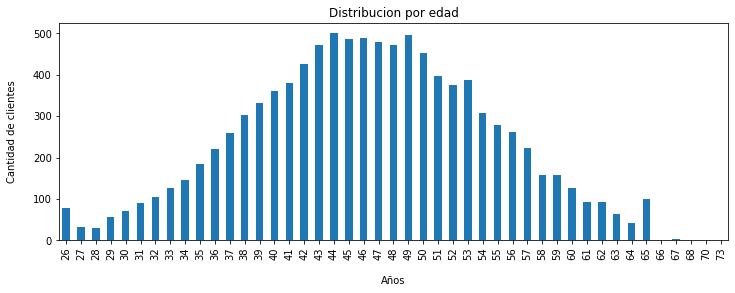

In [ ]:
plt.figure(figsize=(12,4 ))
plt.xlabel("\nAños")
plt.ylabel("Cantidad de clientes\n")
df['Customer_Age'].value_counts().sort_index().plot(kind='bar', title='Distribucion por edad', yticks=[0, 100, 200, 300, 400 ,500])

In [ ]:
df['Education_Level'].mode()
print("Graduado")

Graduado


Cantidad de transacciones según tipo de cliente

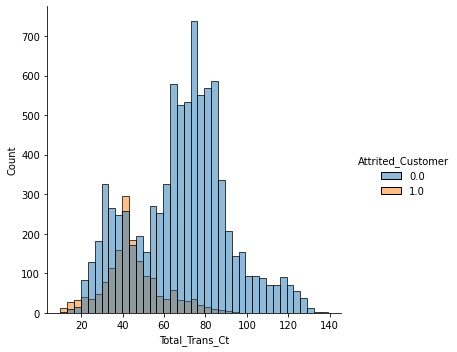

In [ ]:
sns.displot(data=df, x='Total_Trans_Ct', hue='Attrited_Customer')

In [ ]:
px.histogram(df,
            x='Total_Trans_Ct',
            color='Attrited_Customer',
            barmode='overlay')

## Correlacion <a name="q9"></a>

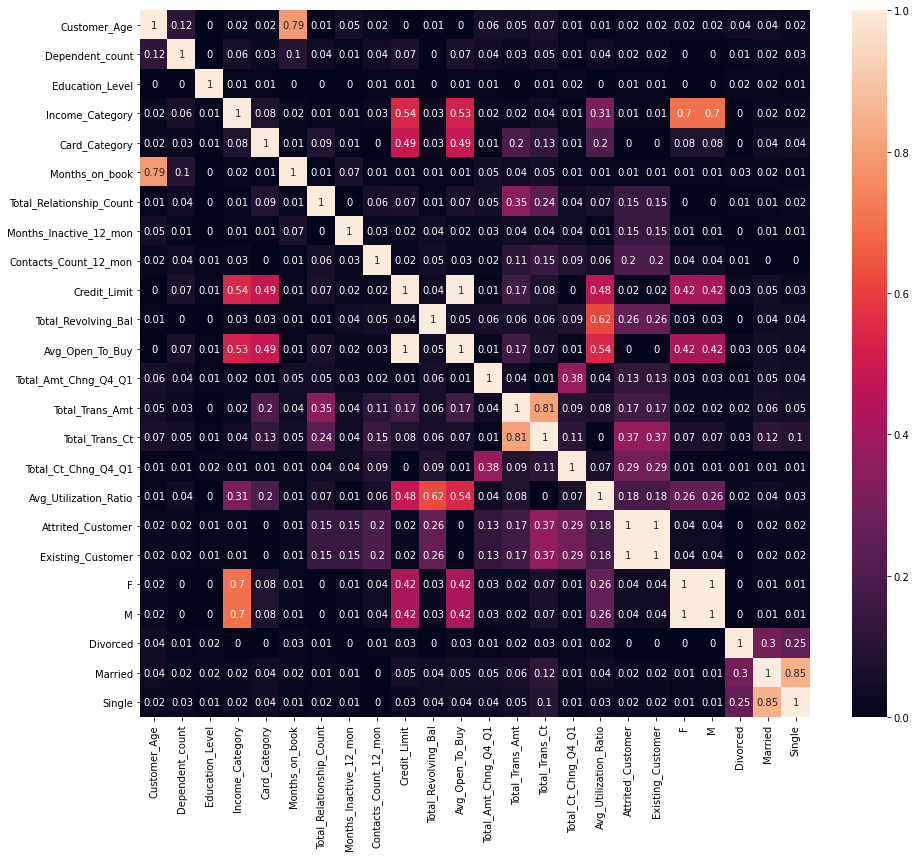

In [ ]:
plt.figure(figsize=(15,13))
sns.heatmap(round(abs(df.corr()),2),
            annot=True)
plt.show()

Se consideran aquellas variables que poseen un peso mayor al 5% de correlación con el target.

In [ ]:
corr_imp = df.corr()[['Attrited_Customer']]
corr_imp = abs(corr_imp[abs(corr_imp) > 0.05].dropna()).sort_values('Attrited_Customer',ascending=False)



In [ ]:
df_VariablesCorrelacion=df[['Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Total_Revolving_Bal','Contacts_Count_12_mon','Avg_Utilization_Ratio','Total_Trans_Amt','Months_Inactive_12_mon','Total_Relationship_Count','Total_Amt_Chng_Q4_Q1']]

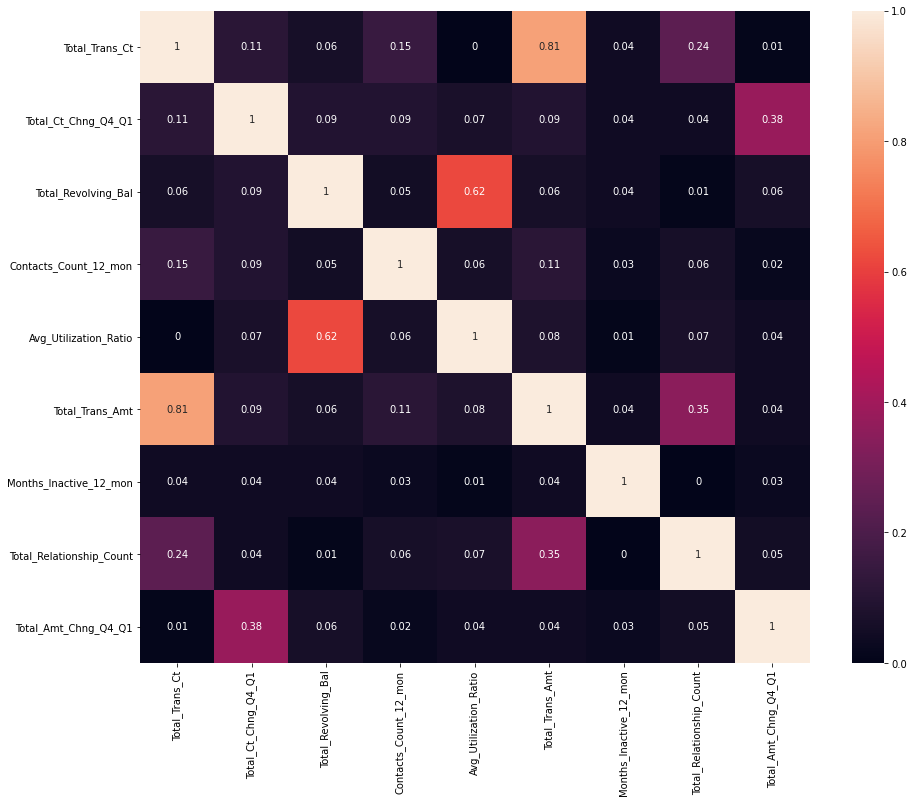

In [ ]:
plt.figure(figsize=(15,12))
sns.heatmap(round(abs(df_VariablesCorrelacion.corr()),2),
            annot=True)
plt.show()

Relacion entre las variables con un peso mayor de 5% de corelacion con el target ,para no ver si la relacion se solapa

In [ ]:
df_VariablesCorrelacion = df[['Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Total_Revolving_Bal','Contacts_Count_12_mon','Avg_Utilization_Ratio','Total_Trans_Amt','Months_Inactive_12_mon','Total_Relationship_Count','Total_Amt_Chng_Q4_Q1']]
rows,cols=df_VariablesCorrelacion.shape
flds = list(df_VariablesCorrelacion.columns)
corr = df_VariablesCorrelacion.corr().values
for i in range(cols):
    for j in range(i+1, cols):
        if abs(corr[i,j]) > 0.30:
            print (flds[i], ' ', flds[j], ' ', abs(corr[i,j]))

Total_Trans_Ct   Total_Trans_Amt   0.8071920346514343
Total_Ct_Chng_Q4_Q1   Total_Amt_Chng_Q4_Q1   0.3841892560337165
Total_Revolving_Bal   Avg_Utilization_Ratio   0.6240219910058902
Total_Trans_Amt   Total_Relationship_Count   0.34722887963700827


# Entrenamiento <a name="q10"></a>



## Division de dataframe (target y variables predictoras)

X1= todas las variables con mas de 5% de correlacion con el target quitando aquellas que se solapan con las variables predictoras mas fuertes(al menos un 30% de relacion entre ellas)

X2= todas las variables con mas de 5% de correlacion con el target

y=Target

In [ ]:
X1=df[['Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Total_Revolving_Bal','Contacts_Count_12_mon','Avg_Utilization_Ratio','Months_Inactive_12_mon']]
y=df['Attrited_Customer']
X2=df[['Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Total_Revolving_Bal','Contacts_Count_12_mon','Avg_Utilization_Ratio','Total_Trans_Amt','Months_Inactive_12_mon','Total_Relationship_Count','Total_Amt_Chng_Q4_Q1']]

In [ ]:
y.value_counts()

0.000    8500
1.000    1627
Name: Attrited_Customer, dtype: int64

## División set de entrenamiento y de prueba <a name="q11"></a>

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X1, y, test_size=0.3, random_state=33)

In [ ]:
print('Cantidad de datos para entrenamiento: ', len(X_train))
print('Cantidad de datos para test: ', len(X_test))
X_train.shape

Cantidad de datos para entrenamiento:  7088
Cantidad de datos para test:  3039


(7088, 6)

## Creacion de Pipelines <a name="q12"></a>


Preprocesador de todas las variables con mas de 5% de correlacion con el target quitando aquellas que se solapan con las variables predictoras mas fuertes(al menos un 30% de relacion entre ellas)

In [ ]:
preprocesador1 = make_column_transformer(
                (StandardScaler(),['Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Total_Revolving_Bal','Contacts_Count_12_mon','Avg_Utilization_Ratio','Months_Inactive_12_mon']),
                remainder='drop'
)     

Preprocesador de todas las variables con mas de 5% de correlacion con el target

In [ ]:
preprocesador2 = make_column_transformer(
                (StandardScaler(),['Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Total_Revolving_Bal','Contacts_Count_12_mon','Avg_Utilization_Ratio','Total_Trans_Amt','Months_Inactive_12_mon','Total_Relationship_Count','Total_Amt_Chng_Q4_Q1']),
                remainder='drop'              
              )


In [ ]:
X_train_transform=pd.DataFrame(preprocesador1.fit_transform(X_train))

In [ ]:
X_test_transform=pd.DataFrame(preprocesador1.fit_transform(X_test))

##Balanceo de clases <a name="q13"></a>

Se balancean las clases del set de entrenamiento para evitar el sesgo en las métricas.

In [ ]:
y_train.value_counts()

0.000    5938
1.000    1150
Name: Attrited_Customer, dtype: int64

In [ ]:
X_train.shape

(7088, 6)

In [ ]:
oversample=RandomOverSampler(sampling_strategy=0.3)

In [ ]:
X_train_os, y_train_os=oversample.fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



In [ ]:
np.unique(y_train_os, return_counts=True)

(array([0., 1.]), array([5938, 1781]))

In [ ]:
X_train=pd.DataFrame(X_train_os, columns=X_train.columns)

In [ ]:
X_train.shape

(7719, 6)

SMOTE

In [ ]:
over_smote=SMOTE(sampling_strategy=0.5)
X_train_sm, y_train_sm=over_smote.fit_resample(X_train, y_train_os)
X_train_sm.shape

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



(8907, 6)

In [ ]:
X_train=pd.DataFrame(X_train_sm, columns=X_train.columns)

In [ ]:
np.unique(y_train_sm, return_counts=True)

(array([0., 1.]), array([5938, 2969]))

In [ ]:
y_train=pd.DataFrame(y_train_sm)

## Cross Validation

In [ ]:
folds= KFold(n_splits=4, shuffle=True, random_state=1)
folds

KFold(n_splits=4, random_state=1, shuffle=True)

# MODELOS

## Hiperparametros

### Regresion Logistica

In [ ]:
modeler=make_pipeline(preprocesador1, LogisticRegression())

In [ ]:
params = {'logisticregression__solver': ['newton-cg', 'lbfgs'],
          'logisticregression__C':[0.001,.009,0.01,.09,1,5,6,7,10,25],
          'logisticregression__penalty':['l1', 'l2', 'elasticnet', 'none']}

grid = GridSearchCV(modeler, param_grid = params, scoring='recall')
grid.fit(X_train,y_train)
grid.score(X_train, y_train)
grid.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarni

{'logisticregression__C': 0.001,
 'logisticregression__penalty': 'none',
 'logisticregression__solver': 'newton-cg'}

In [ ]:
print("Best parameter (CV score=%0.3f):" % grid.best_score_)
print(grid.best_params_)

Best parameter (CV score=0.679):
{'logisticregression__C': 0.001, 'logisticregression__penalty': 'none', 'logisticregression__solver': 'newton-cg'}


### KNN

In [ ]:
modeler = make_pipeline(preprocesador1, 
                        KNeighborsClassifier())

In [ ]:
%%capture
knn = KNeighborsClassifier()
params={'kneighborsclassifier__n_neighbors': [5,6,7,8,9,10,11,12]}

grid = GridSearchCV(modeler,  param_grid=params, scoring='recall' )
grid.fit(X_train,y_train)
grid.score(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % grid.best_score_)
print(grid.best_params_)

In [ ]:
grid.best_score_

0.8511421125249118

### Arbol de decision


In [ ]:
modeler = make_pipeline(preprocesador1, 
                        DecisionTreeClassifier())

In [ ]:

params={'decisiontreeclassifier__criterion': ['gini', 'entropy'],
       'decisiontreeclassifier__max_depth':[2,3,4,5, 6, 7, 10]}
grid = GridSearchCV(modeler,  param_grid=params, scoring='recall' )
grid.fit(X_train,y_train)
grid.score(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % grid.best_score_)
print(grid.best_params_)


Best parameter (CV score=0.830):
{'decisiontreeclassifier__criterion': 'gini', 'decisiontreeclassifier__max_depth': 10}


### SVM

In [ ]:
modeler=make_pipeline(preprocesador1,SVC())

In [ ]:
%%capture
params={'svc__C': [0.5,1, 2],
        'svc__kernel':['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']}
grid = GridSearchCV(modeler,  param_grid=params, scoring='recall' )
grid.fit(X_train,y_train)
grid.score(X_train, y_train)


In [ ]:
print("Best parameter (CV score=%0.3f):" % grid.best_score_)
print(grid.best_params_)

Best parameter (CV score=0.791):
{'svc__C': 2, 'svc__kernel': 'rbf'}


### XGBClassifier()

In [ ]:
modeler = make_pipeline(preprocesador1,
                        XGBClassifier())

In [ ]:
%%capture
params={'xgbclassifier__booster': ['gbtree','gblinear'],
        'xgbclassifier__max_depth':[3, 4, 5, 6, 8,9,10]}
grid = GridSearchCV(modeler,  param_grid=params, scoring='recall' )
grid.fit(X_train,y_train)
grid.score(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % grid.best_score_)
print(grid.best_params_)


## Pipelines de entrenamiento <a name="q19"></a>

Funcion para graficar la curva ROC

In [ ]:
def plot_roc_curve_2(fpr, tpr):
    plt.figure(figsize=(12,7))
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    for i  in range(0, len(fpr)):
        plt.plot(fpr[i], tpr[i], label=str(modelos[i])[:10]) 
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [ ]:
metricas=['accuracy', 'recall', 'precision', 'f1','roc_auc']

In [ ]:
modelos = [
    LogisticRegression(C= 0.001, solver= 'newton-cg',penalty = 'none'),
    DecisionTreeClassifier(criterion='gini', max_depth=10),
    KNeighborsClassifier(n_neighbors=5),
    XGBClassifier(booster='gbtree',max_depth='6'),
    RandomForestClassifier(n_estimators=5, criterion='gini'),
    SVC(C=2, kernel='rbf',probability=True)
    ]

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning:

Setting penalty='none' will ignore the C and l1_ratio parameters

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

Using 3039 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


LogisticRegressCon 5 folds 

Accuracy: 0.8205913216503654
Recall: 0.6771418707507205
Precision: 0.7583787936154587
F1: 0.7153326116102164
roc_auc: 0.8838429620752173
----------------------- 

                                 Modelo sin cross validation
LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False) 

Accuracy en entrenamiento : 0.821
[[2283  279]
 [ 158  319]] 

Accuracy Score : 0.8562026982560053
Precision Score : 0.5334448160535117
Recall Score : 0.6687631027253669
F1 Score : 0.5934883720930232
----------------------- 

                                Explainability del Modelo


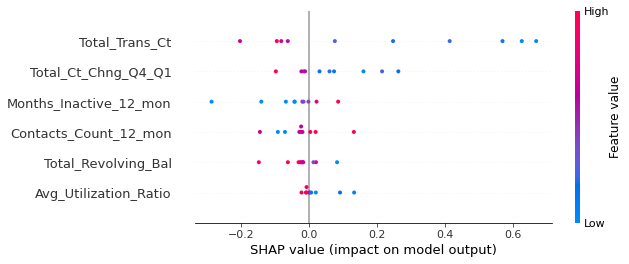

---------------------------------------------------------------------------------------



Using 3039 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


DecisionTreeClaCon 5 folds 

Accuracy: 0.8802062089418801
Recall: 0.8145410034918056
Precision: 0.8241617813816705
F1: 0.8191616456557268
roc_auc: 0.9176667369811127
----------------------- 

                                 Modelo sin cross validation
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') 

Accuracy en entrenamiento : 0.93
[[2348  214]
 [ 137  340]] 

Accuracy Score : 0.8845014807502468
Precision Score : 0.6137184115523465
Recall Score : 0.7127882599580713
F1 Score : 0.6595538312318138
----------------------- 

                                Explainability del Modelo


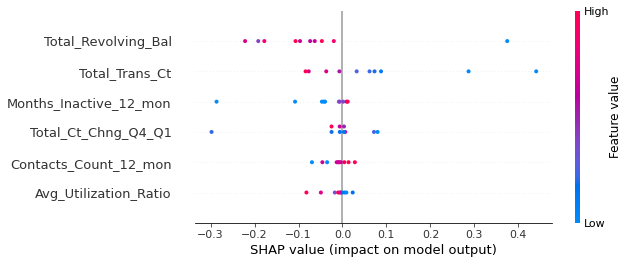

---------------------------------------------------------------------------------------

KNeighborsClassCon 5 folds 

Accuracy: 0.8771756794320782
Recall: 0.8305988340359938
Precision: 0.8065322323378762
F1: 0.8183168892290497
roc_auc: 0.9393745801779685
----------------------- 

                                 Modelo sin cross validation
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') 



/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:354: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

Using 3039 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


Accuracy en entrenamiento : 0.923
[[2319  243]
 [ 148  329]] 

Accuracy Score : 0.8713392563343205
Precision Score : 0.5751748251748252
Recall Score : 0.689727463312369
F1 Score : 0.6272640610104862
----------------------- 

                                Explainability del Modelo


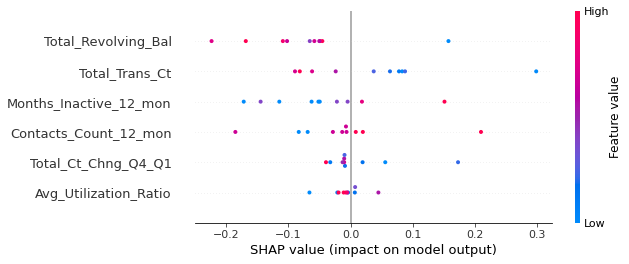

---------------------------------------------------------------------------------------

XGBClassifier(bCon 5 folds 

Accuracy: 0.9073768352220623
Recall: 0.8484811280432669
Precision: 0.8702184809793928
F1: 0.8591626906676458
roc_auc: 0.9673664958808338
----------------------- 



/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

Using 3039 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


                                 Modelo sin cross validation
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth='6',
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1) 

Accuracy en entrenamiento : 0.941
[[2418  144]
 [ 124  353]] 

Accuracy Score : 0.9118130964132939
Precision Score : 0.710261569416499
Recall Score : 0.740041928721174
F1 Score : 0.7248459958932237
----------------------- 

                                Explainability del Modelo


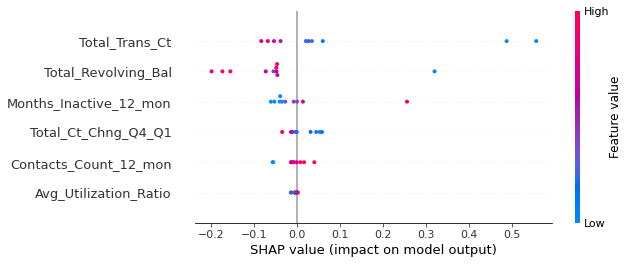

---------------------------------------------------------------------------------------



/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:354: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

Using 3039 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


RandomForestClaCon 5 folds 

Accuracy: 0.9067020730227853
Recall: 0.8696207719678098
Precision: 0.8532224675473137
F1: 0.8613150346868984
roc_auc: 0.949103904015205
----------------------- 

                                 Modelo sin cross validation
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) 

Accuracy en entrenamiento : 0.988
[[2383  179]
 [ 166  311]] 

Accuracy Score : 0.8864758144126358
Precision Score : 0.6346938775510204
Recall Score : 0.6519916142557652
F1 Score : 0.6432264736297829
-

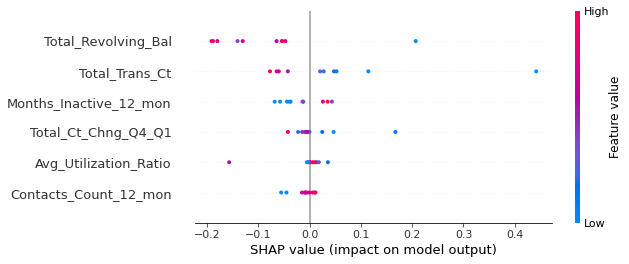

---------------------------------------------------------------------------------------

SVC(C=2, break_Con 5 folds 

Accuracy: 0.8722360973771619
Recall: 0.7834290889719084
Precision: 0.8243257416120621
F1: 0.8032621915860413
roc_auc: 0.9410195580110128
----------------------- 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



                                 Modelo sin cross validation
SVC(C=2, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False) 

Accuracy en entrenamiento : 0.884
[[2362  200]
 [ 119  358]] 

Accuracy Score : 0.8950312602829879
Precision Score : 0.6415770609318996
Recall Score : 0.750524109014675
F1 Score : 0.6917874396135265
----------------------- 

                                Explainability del Modelo


Using 3039 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


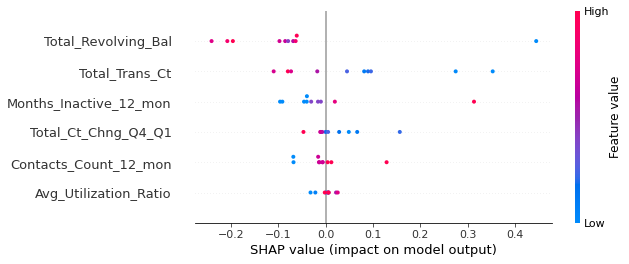

---------------------------------------------------------------------------------------



In [ ]:
fpr_list=[]
tpr_list=[]

for i in range(0, len(modelos)):
    modelo=modelos[i]
    modeler=make_pipeline(preprocesador1, modelo)
    fold=KFold(n_splits=4, random_state=1, shuffle=True)
    scores=cross_validate(modeler,
                         X_train,
                         y_train,
                         scoring=metricas,
                         cv=fold,
                         n_jobs=-1)
    

    print(str(modelo)[:15]+"Con 5 folds", '\n')
    print('Accuracy:', scores['test_accuracy'].mean())
    print('Recall:', scores['test_recall'].mean())
    print('Precision:', scores['test_precision'].mean())
    print('F1:', scores['test_f1'].mean())
    print('roc_auc:', scores['test_roc_auc'].mean())
    print('----------------------- \n')

    modeler.fit(X_train, y_train)
    y_pred=modeler.predict(X_test)
    print('                                 Modelo sin cross validation')
    print(modelo, '\n')
    print('Accuracy en entrenamiento :', round(modeler.score(X_train, y_train),3))
    print(confusion_matrix(y_test, y_pred), '\n')
    print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
    print('Precision Score : ' + str(precision_score(y_test,y_pred)))
    print('Recall Score : ' + str(recall_score(y_test,y_pred)))
    print('F1 Score : ' + str(f1_score(y_test,y_pred)))
    print('----------------------- \n')

    print('                                Explainability del Modelo')
    modelo_entrenado=modeler[-1]
    X_test_pred=preprocesador1.transform(X_test)
    X_test_pred=pd.DataFrame(X_test_pred)
    explainer= shap.KernelExplainer(modelo_entrenado.predict, X_test_pred)
    X_test_pred.columns=['Total_Trans_Ct',
                         'Total_Ct_Chng_Q4_Q1',
                         'Total_Revolving_Bal',
                         'Contacts_Count_12_mon',
                         'Avg_Utilization_Ratio',
                         'Months_Inactive_12_mon']
    shap_values=explainer.shap_values(X_test_pred.iloc[:10,:])
    shap.summary_plot(shap_values, X_test_pred.iloc[:10, :])
    shap.initjs()
    shap.force_plot(explainer.expected_value, shap_values[1], X_test_pred.iloc[1,:])
    print('---------------------------------------------------------------------------------------\n')
    
    
    probs=modeler.predict_proba(X_train)
    probs=probs[:,1]
    fpr, tpr, umbral=roc_curve(y_train, probs)
    fpr_list.append(fpr)
    tpr_list.append(tpr)

In [ ]:
plot_roc_curve_2(fpr_list, tpr_list)


In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[1], X_test_pred.iloc[1,:])